In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


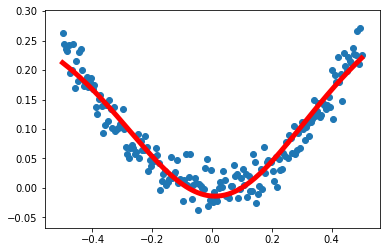

In [20]:
#生成200个随机点 样本
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]#（-0.5，0.5）均匀分布生成200个点

noise = np.random.normal(0,0.02,x_data.shape)

y_data = np.square(x_data) + noise
#定义两个 placeholder

x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层 10个神经元

wights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))

wx_plus_b_L1 = tf.matmul(x,wights_L1) + biases_L1
L1 = tf.nn.tanh(wx_plus_b_L1)#输出值为 L1*激活函数

#定义输出层

wights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
wx_plus_b_L2 = tf.matmul(L1,wights_L2) + biases_L2
prediction = tf.nn.tanh(wx_plus_b_L2)

#代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

#定义会话
with tf.Session() as sess:
    
    #变量初始化 
    sess.run(tf.global_variables_initializer())
    print(sess.run(biases_L1))
    #训练2000次
    for _ in range(2000):
        sess.run(train_step,feed_dict = {x:x_data,y:y_data})
    #获取预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    plt.figure()
    #样本散点图
    plt.scatter(x_data,y_data)
    #
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()
        
